In [1]:
# Import neccesary packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from Brady_processing import *
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
plt.rcParams['figure.dpi']=300

# Table of Contents

The following two are for picking maximum frequencies at selected dates. Can jump directly to 4. since the picked files are already existed.

[2. Load data](#Load-data)

[3. Pick maximum frequency](#Pick-maximum-frequency)


Can start from here:

[4. Frequency shift](#Frequency-shift): Load the picking file and plot.

[5. Derive velocities](#Derive-velocities): Method to estimate the velocities.




# Load data 

## Which date to look at?

In [2]:
# Params =========================================================================
date='0318' # Options: '0318', '0319', ..., '0325'
hr = '06' # Options: '06' or '07' (if 6am is not clear enough for picking)
# =============================================================================

## Load the spectrogram of the correlogram


In [3]:
ccf_stacked = np.load(
    'ccf/2016%s%s3847_ccf_DASV_src180_tspan3600s_wc239_kscaled_.npy'%(date,hr))


#  Pick maximum frequency
    
**(Can skip this, jump to the next section "3. Frequency shift" since fls_list and nms_list are already picked)**

Adjust the picking list: **fls_list** here, check the pickings on the plot and save fls_list.


fls_list is a list of maximum frequencies for the first 5 modes for the 8 days.

Also get **nms_list**: A list of the shape of these modes at these maximum frequencies. 

## Plot the spectrogram


The 99th percentile is 1021.240850; the max amplitude is 1951.739724


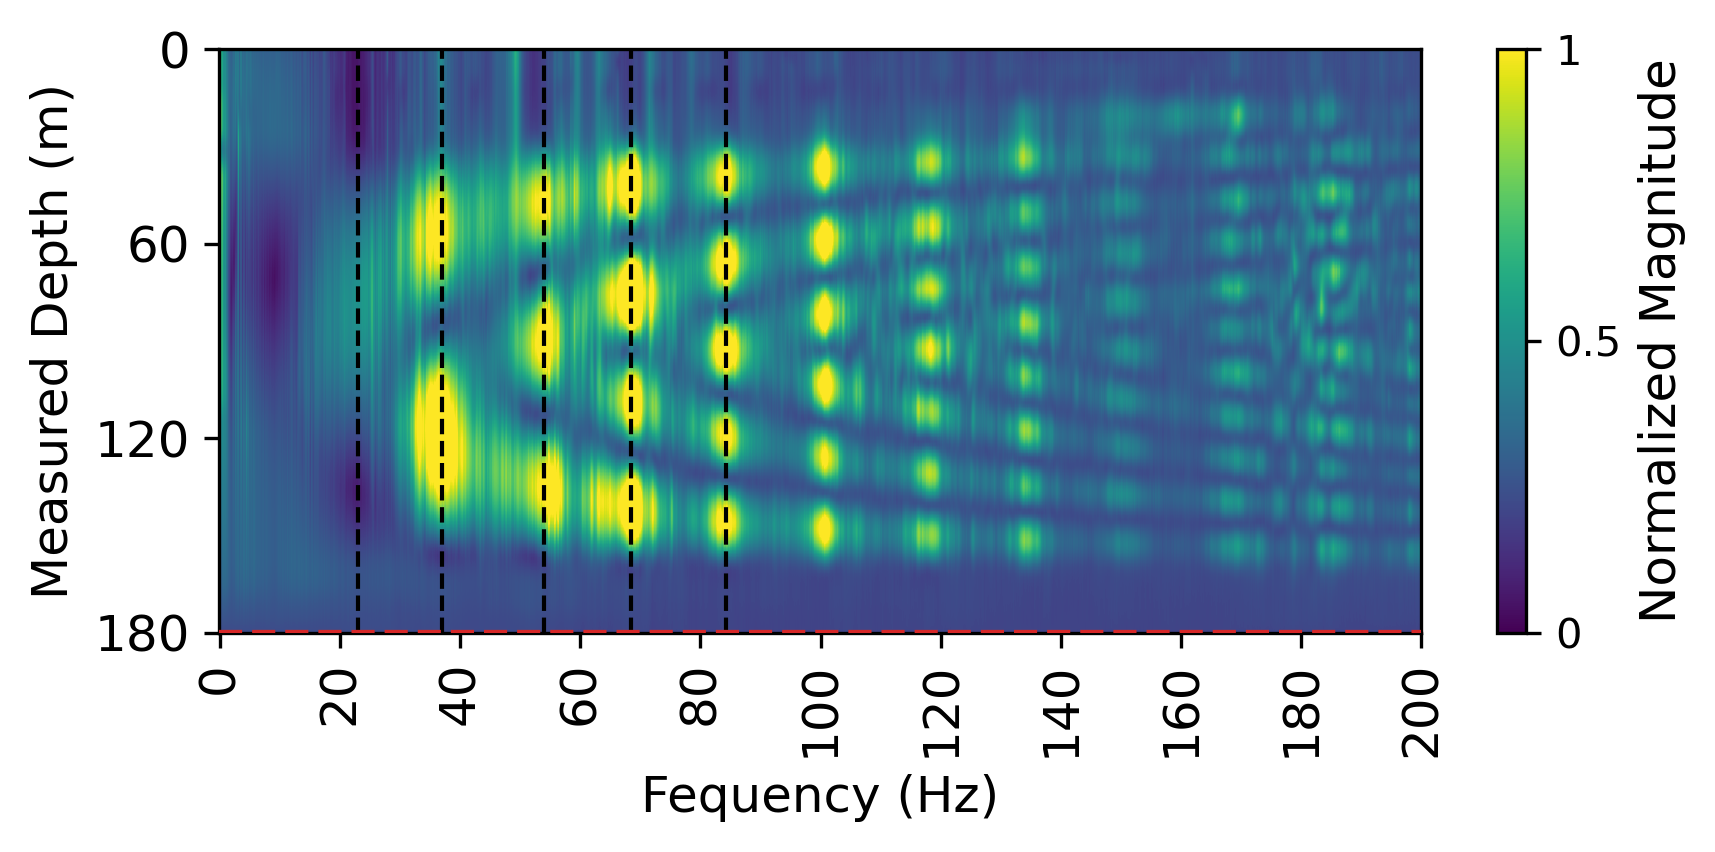

In [4]:
# Params =============================================================================
scale=1 # For adjusting color intensity
plot_picking=True 
# Maximum frequency pickings for the first 5 modes  
fls_list=np.array([[ 23. ,  37. ,  54. ,  68.5, 84.3 ],   # at 3/18 06:38
                    [ 26. ,  37. ,  56. ,  69., 86.5 ],   # at 3/19 06:38
                    [ 26. ,  39. ,  56.5,  73., 88.5 ],   # at 3/20 06:38 
                    [ 26. ,  39. ,  56.5,  73., 88.5 ],   # at 3/21 06:38 
                    [ 26. ,  39. ,  56.5,  73.5, 91.5 ],  # at 3/22 07:38 
                    [ 26. ,  39.5,  56.5,  74., 92.2 ],   # at 3/23 07:38
                    [ 26. ,  39.5,  56.5,  74., 93 ],     # at 3/24 07:38
                    [ 26. ,  39.5,  56.5,  74.5, 93]])    # at 3/25 06:38
#=============================================================================

# Get the corresponding picks for the date to plot
f_ls= fls_list[np.where(
    np.array(['0318','0319','0320','0321','0322','0323','0324','0325'])==date)[0][0]]

src=180
fst=1000.
fsx=1.
plt.rcParams['font.size']=12
fmax=200
fmin=0
df=20

Nt=int(round(len(ccf_stacked[0])))
nmin = int(Nt*fmin/fst)
nmax = int(Nt*fmax/fst)
dn = int(Nt*df/fst)
data=ccf_stacked[:,nmin:nmax]
cmap='viridis'
cbar_title='Normalized Magnitude'
vmin=0

vm = np.percentile(data, 99) # Setting color scale
print("The 99th percentile is {:f}; the max amplitude is {:f}".format(vm, data.max()))

fig,ax=plt.subplots(figsize=(6,3)) 
plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vm/scale, aspect='auto')
cbar= plt.colorbar()

# Normalize color bar
cbar.set_ticks([vmin,(vm/scale-vmin)/2+vmin,vm/scale])
cbar.set_ticklabels([0,0.5,1])
cbar.ax.tick_params(labelsize=10)
cbar.set_label(cbar_title)

plt.ylabel('Measured Depth (m)')
plt.xticks(rotation=90)
ticks=np.arange(0,nmax-nmin+1,dn)
plt.xticks(ticks)
ax.set_xticklabels(np.arange(fmin,fmax+1,df))
ax.set_xlabel('Fequency (Hz)')
plt.yticks(np.arange(0,360+1,60))
if plot_picking==True:
    # Draw vlines
    for f_l in [f for f in f_ls if fmin<=f<=fmax]:
        nf = int(Nt*f_l/fst-nmin)
        plt.axvline(x=nf,linewidth=1,linestyle='dashed',color='k') 
plt.axhline(y=src,color='tab:red',linestyle='dashed',zorder=8)
plt.ylim(src,0)   # Option: Only display the upper part
    
plt.tight_layout()
plt.show()

## Double check plot to make sure the picks are the maximum 

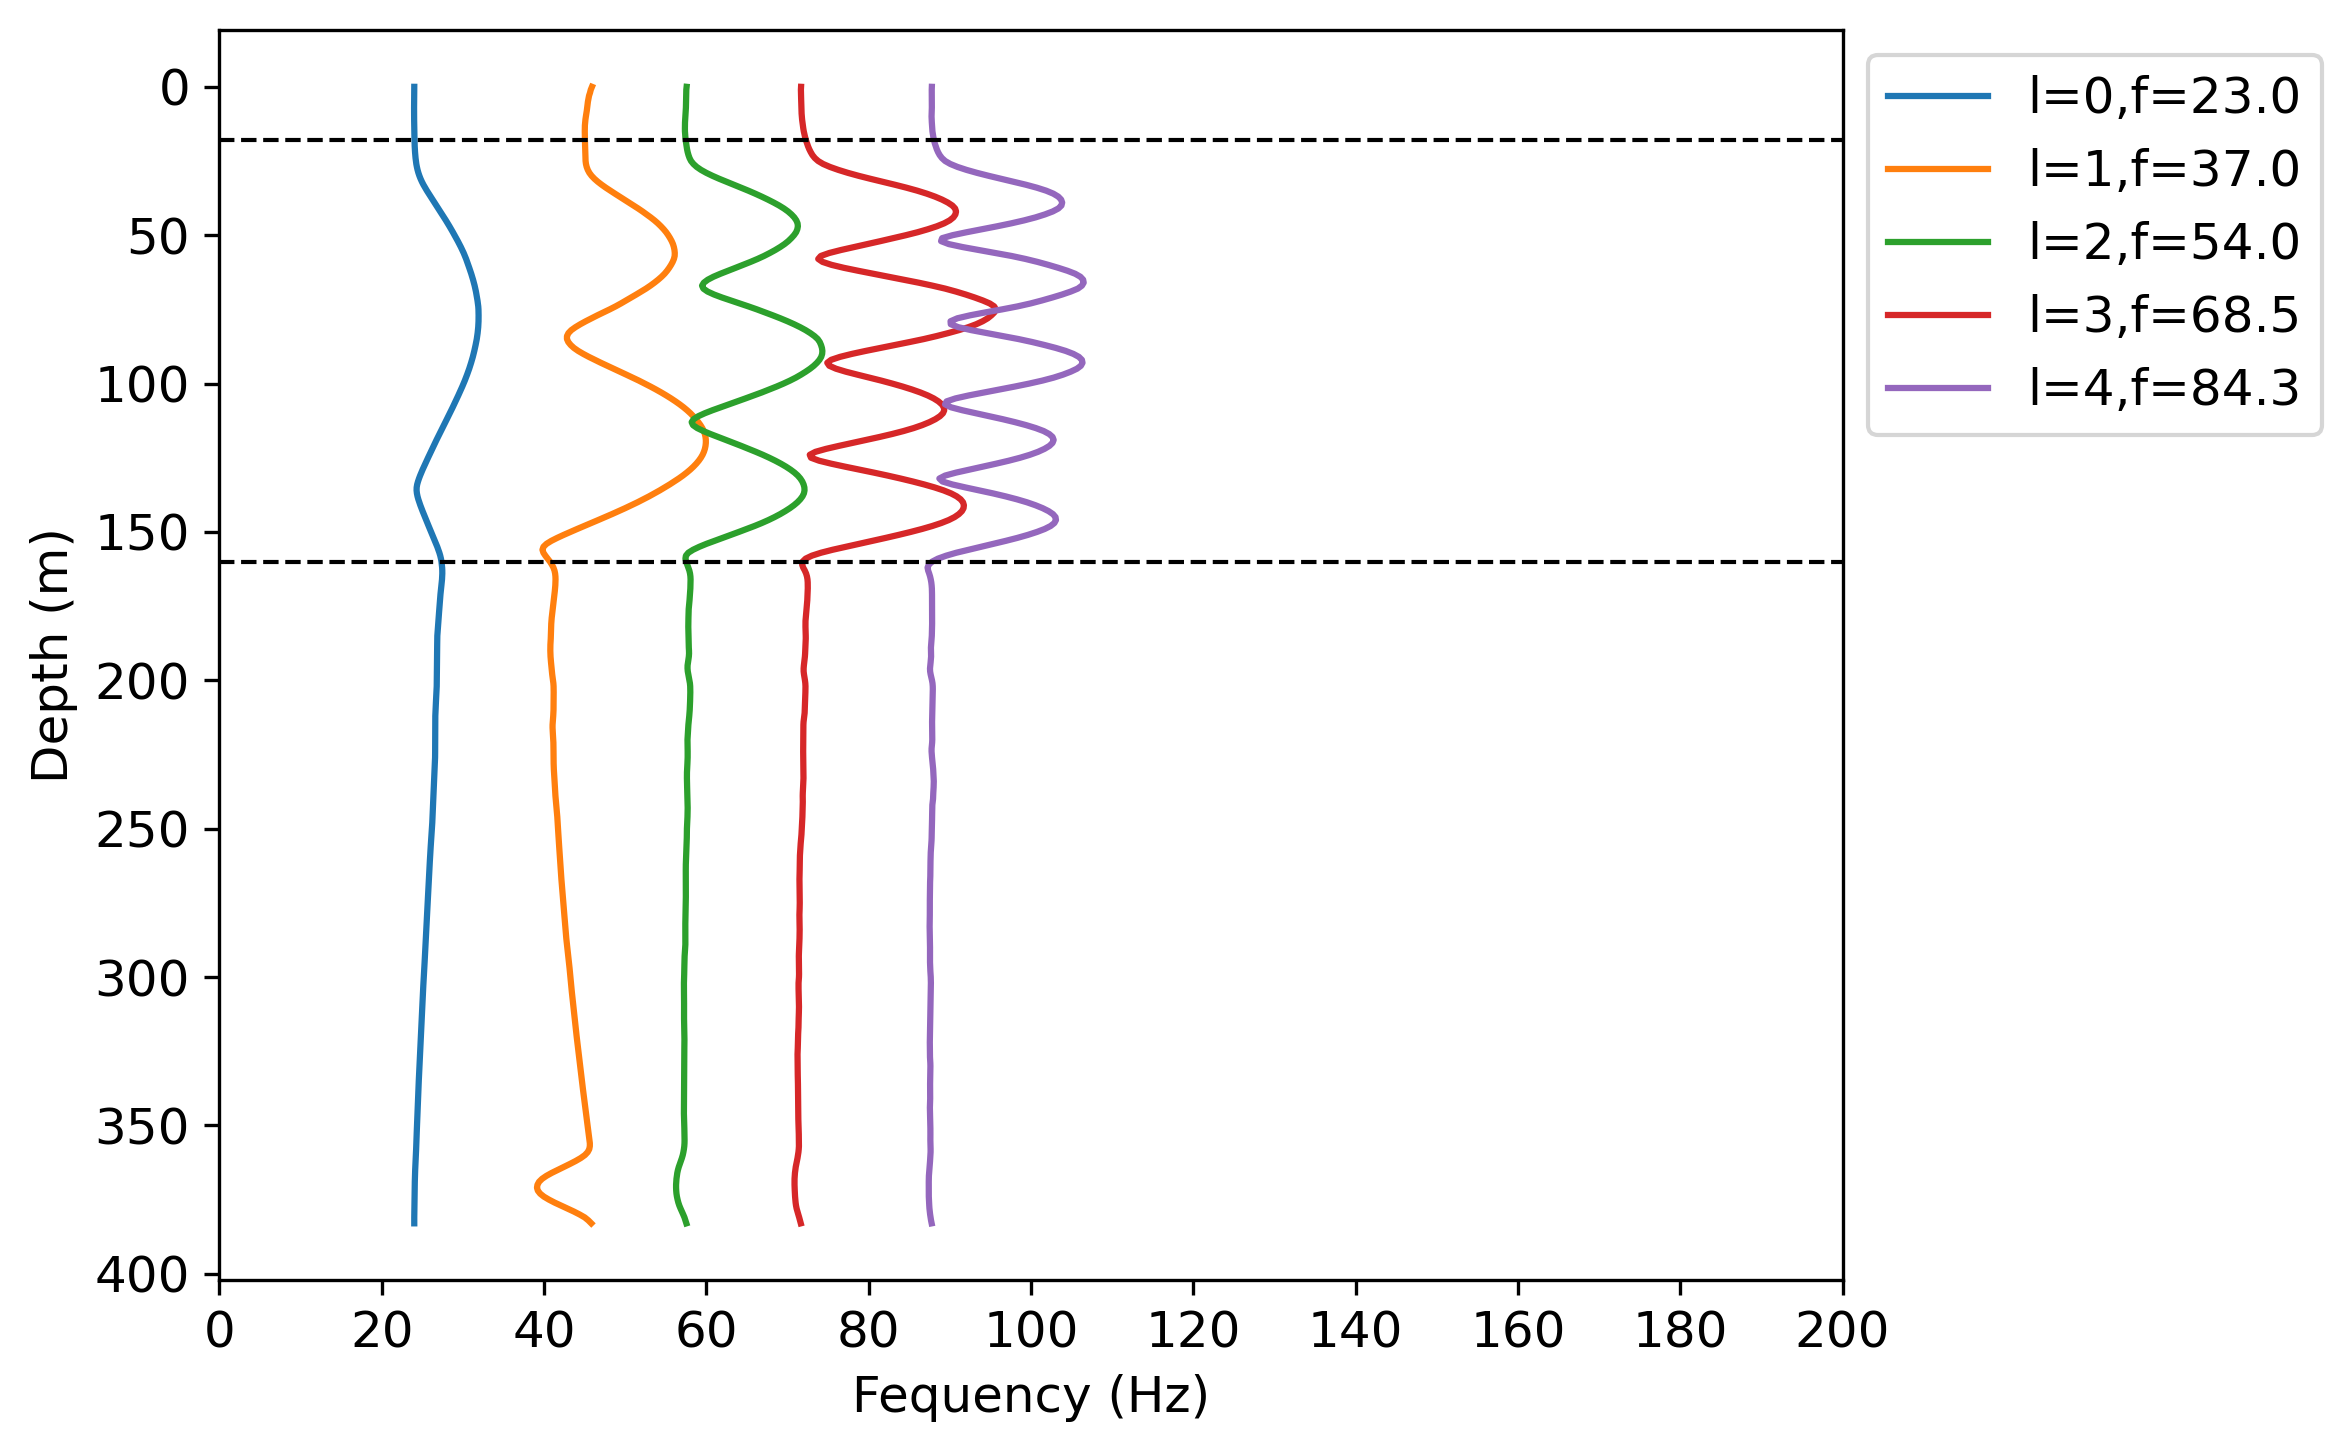

In [5]:
# Plot the modes at the picked frequencies 
# Params =============================================================================
scale=0.5 # For adjusting amplitude 
# =============================================================================
Nt=round(len(ccf_stacked[0]))
fmax=200
fmin=0
f_ls=np.asarray(f_ls)
dep=np.arange(0,len(ccf_stacked),1)
deps=[18,160]  # Plotting dashed lines just for checking purpose

fig,ax = plt.subplots(figsize=[8,5])
for i,f_l in enumerate([f for f in f_ls if fmin<=f<=fmax]):
    nf = int(Nt*f_l/fst-nmin)
    plt.plot(ccf_stacked.T[nf]*scale+Nt*f_l/fst, dep,label='l=%s,f=%s'%(i,f_l))
for dep in deps:
     plt.axhline(y=dep,linewidth=1,linestyle='dashed',color='k') 
ticks=np.arange(0,nmax-nmin+1,dn)
plt.xticks(ticks)
ax.set_xticklabels(np.arange(fmin,fmax+1,df))
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Fequency (Hz)')
plt.legend(bbox_to_anchor=[1,1])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Save the pickings 
Save the pickings (fls_list) to fls_list_v1.npy.

Save the shape of the mode to nms_list_v4.npy.

**Will overwite the existing files. Comment them back in if need to update the picks.**

In [6]:
# # The date and hr these picks are made
# data_hr_list=[1806,1906,2006,2106,2207,2307,2407,2506]

# #%%%% Collecting data stage: Append
# nms_list =[] 
# for i,data_hr in enumerate(data_hr_list):
#     filename = 'ccf/src180_v2_no_kdemean/201603'+str(data_hr)+'3847_ccf_DASV_src180_tspan3600s_wc239_kscaled_.npy'
#     ccf_stacked = np.load(filename)
#     nms_sub_list=[]
#     # Loop over f at each day i
#     for j,f_ls in enumerate(fls_list[i]):
#         nms_sub_list.append(np.take(ccf_stacked,(Nt*f_ls/fst-nmin).astype(int),axis=1))
#     nms_list.append(nms_sub_list)
        
# #%%%% Collecting data stage: Save
# nms_list=np.asarray(nms_list)
# fls_list=np.asarray(fls_list)
# print('nms_list.shape=',nms_list.shape)
# print('fls_list.shape=',fls_list.shape)

# # nms_list=np.swapaxes(nms_list,1,2) 
# np.save('save/nms_list_v4.npy',nms_list)
# np.save('save/fls_list_v1.npy',fls_list)


# Frequency shift

## Load the pickings

In [7]:
fls_list=np.load('fls_list_v1.npy')  # The maximum frequencies for the 8 days
nms_list=np.load('nms_list_v4.npy')  # The mode shape at these max freq

print('fls_list.shape=',fls_list.shape)
print('nms_list.shape=',nms_list.shape)

fls_list.shape= (8, 5)
nms_list.shape= (8, 5, 384)


## Plot fls_list

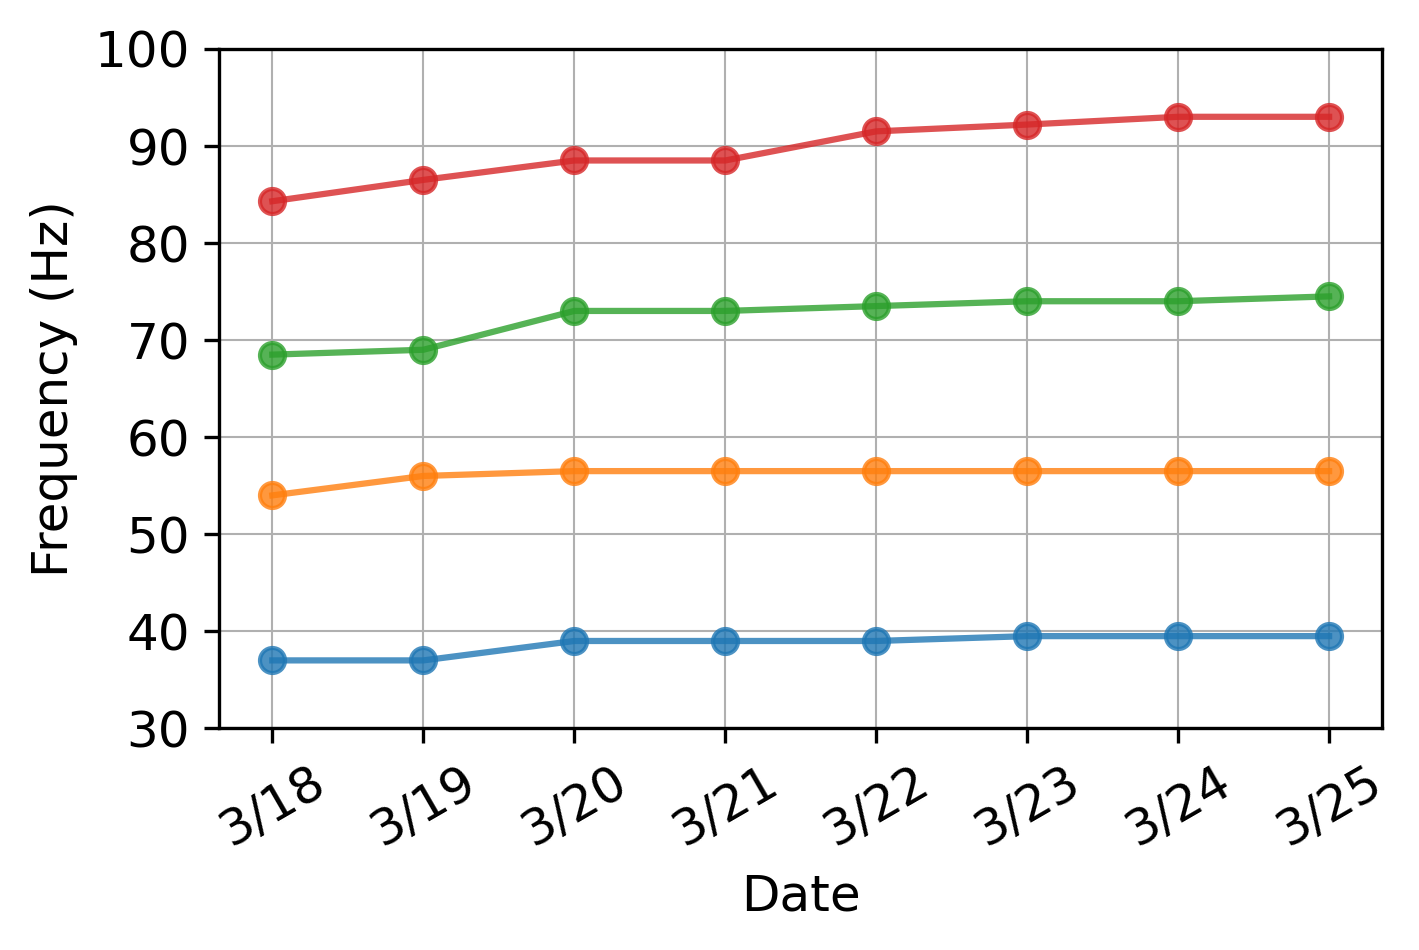

In [8]:
#Plot the frequency changes
fig,ax=plt.subplots(figsize=[5,3])
plt.rcParams['font.size']=18
for m,m_trace in enumerate(fls_list.T):
    if m !=0:
        plt.plot(m_trace,marker='o',label='Mode %s'%(m+1),alpha=0.8)
plt.minorticks_on
plt.grid(linewidth=0.5, which='both')
ax.set_yticks(np.arange(30,100+1,10))
ax.set_xticks(np.arange(0,8,1))
ax.set_xticklabels(['3/%s'%i for i in np.arange(18,25+1,1)],rotation=30)
np.arange(0,8+1,1)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Date')
plt.show()

## Select the depth range and mode range to look at

In [9]:
dep0,dep1  = 0,180 # Look at channel 0~180
mode0,mode1= 2,4 # Look at mode 2,3,4 (theses 3 have the most confident pickings)
nms_list=nms_list[:,:,dep0:dep1+1]
fls_list=fls_list[:,0:mode1]

# Derive velocities

The velocities for each mode are derived from the frequencies of that mode (in fls_list) and the length of the propagation (L_list) using the following relationship:
<img src="c_f_L.png">



## Measure the length of the modes (L_list)

Note: H in the above formulation is L in the variables below.

Measure the approximate propagation length from nms_list and plot to check (if the location of the black dots are satisfying). 

L_list= [[140 139 134 131 131 129 128 127]
 [140 139 134 131 131 129 128 127]
 [140 139 134 131 131 129 128 127]
 [140 139 134 131 131 129 128 127]]


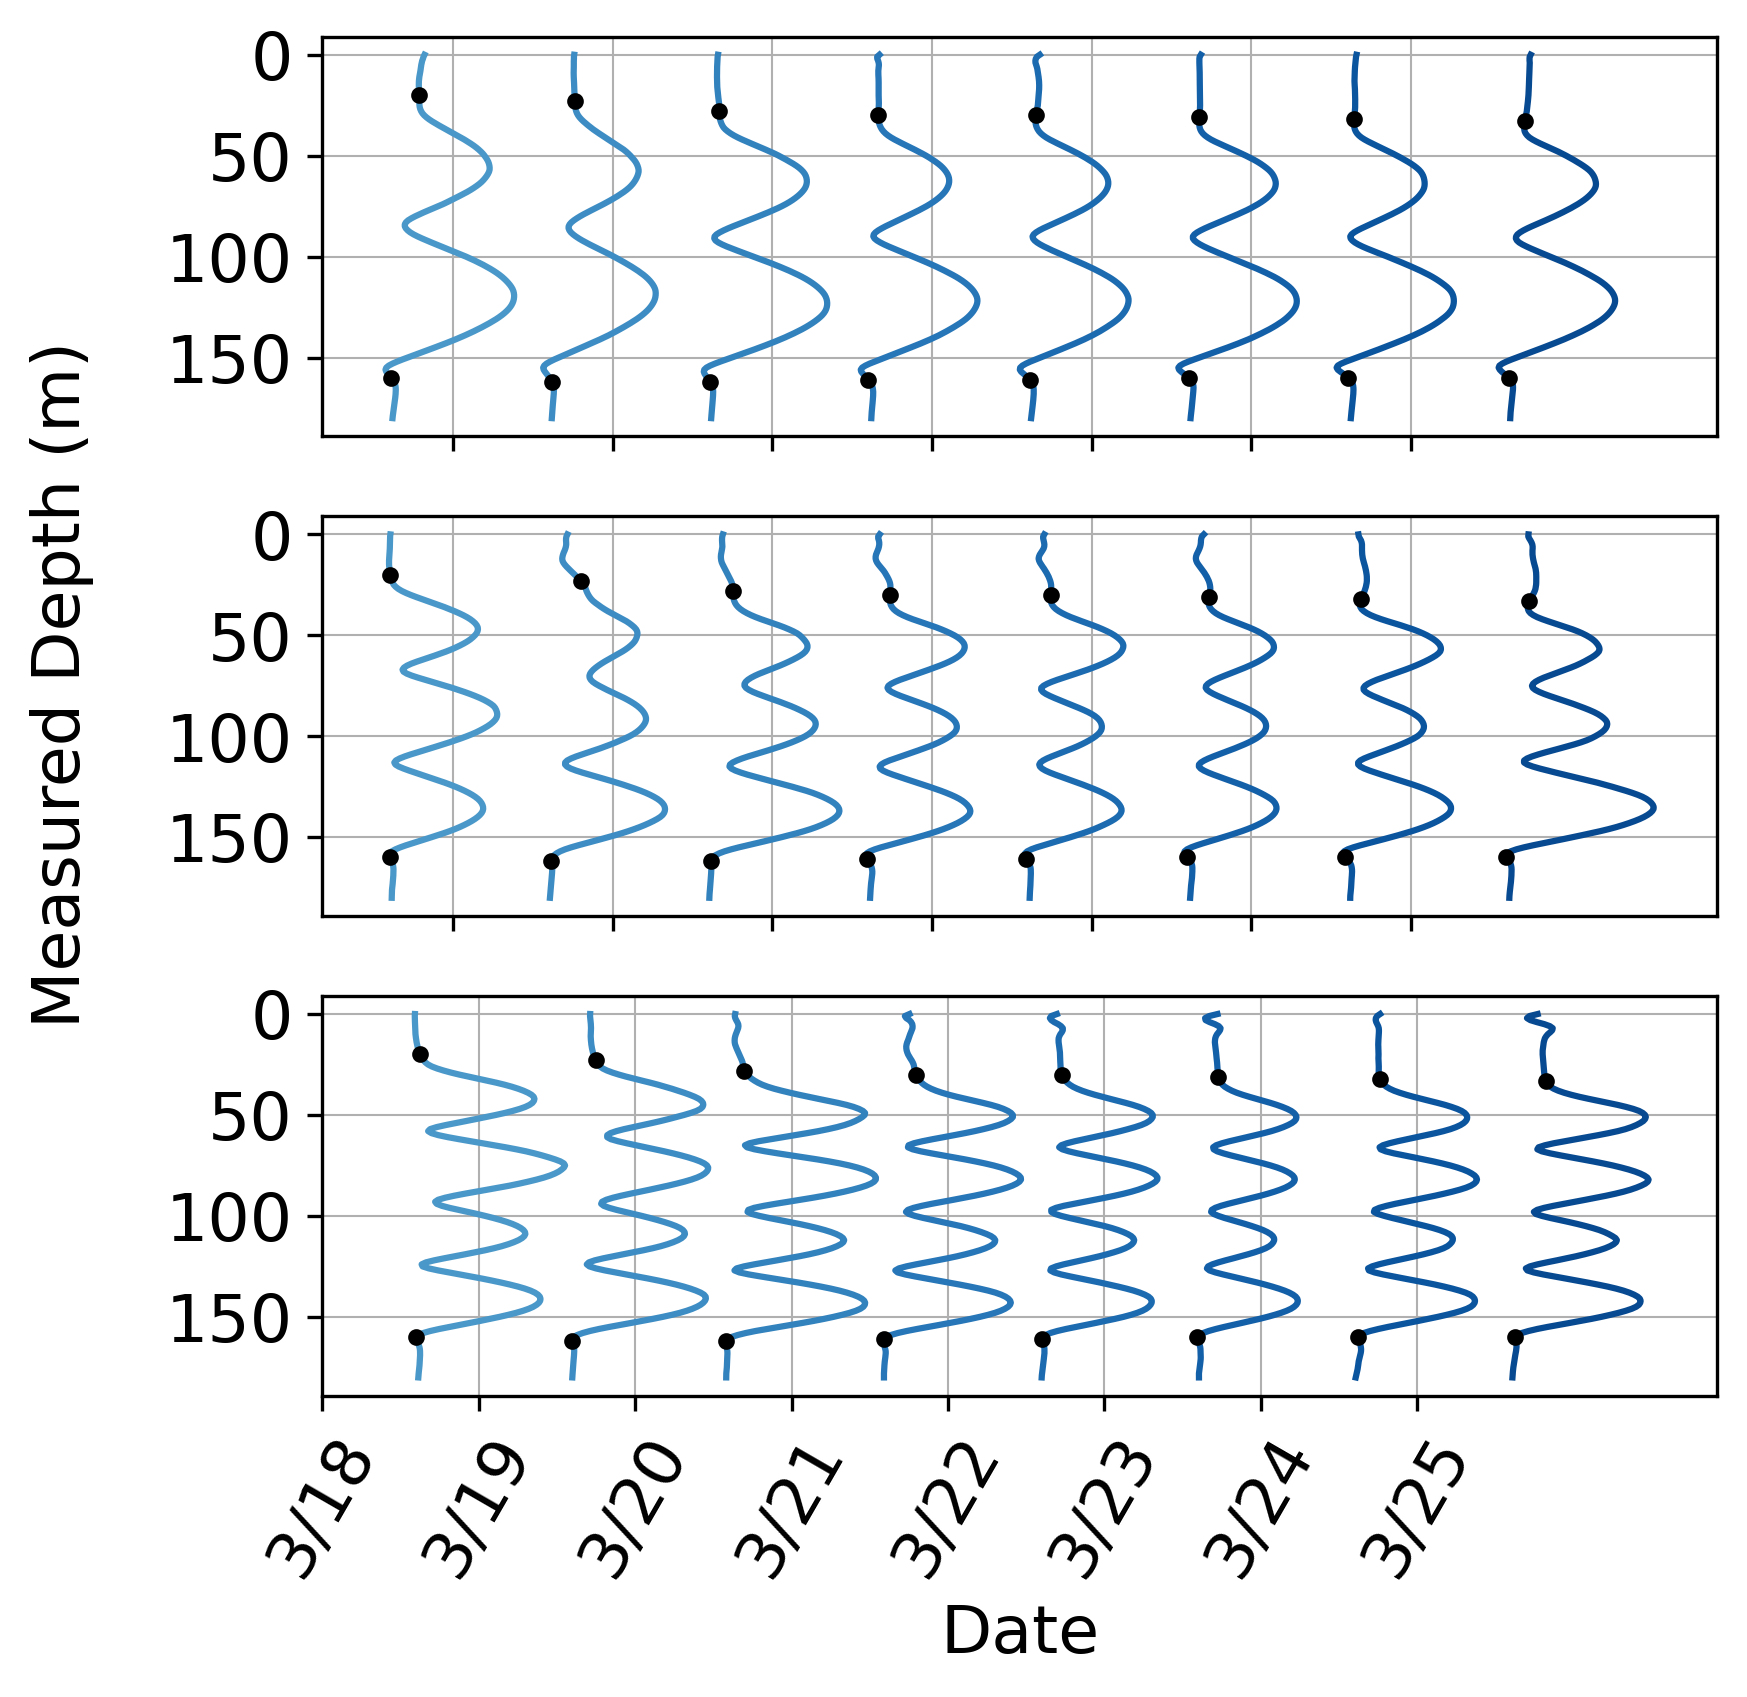

In [10]:
# Params =============================================================================
L0=np.tile([20,23,28,30,30,31,32,33] ,[4,1])  # Upper end of the propagation
L1=np.tile([160,162,162,161,161,160,160,160],[4,1]) # Lower end of the propagation
L_list= L1-L0 # The evolution of the propagation length across the 8 days
print('L_list=',L_list)

# Scales to make the plot nicer
scales=[0.2,0.2,0.2,0.2,0.2] 
sep=300
# =============================================================================
dep=np.arange(dep0,dep1+1,1)

# Plot for checking 
plt.rcParams['font.size']=16
fig,axs=plt.subplots(mode1-mode0+1,1,figsize=[6,6],sharex=True,sharey=True)

# Set color for the curves
colormap = plt.cm.Blues
colorst = [colormap(i) for i in np.linspace(0.6, 0.9,len(nms_list))]       

for j,l in enumerate(range(mode0,mode1+1)):
    for i,nms in enumerate(nms_list): # shape= (8,9,384)
        axs[j].plot(nms[l-1]*scales[l-1]+sep*i,dep,color=colorst[i])
        axs[j].plot(nms[l-1,L0[l-1,i]]*scales[l-1]+sep*i,L0[l-1,i],color='k',marker='.')
        axs[j].plot(nms[l-1,L1[l-1,i]]*scales[l-1]+sep*i,L1[l-1,i],color='k',marker='.')
        axs[j].grid(linewidth=0.5)
        
axs[0].invert_yaxis()
plt.text(-700,0,'Measured Depth (m)',rotation=90)
plt.xlabel('Date')
plt.yticks(np.arange(0,180+1,50))
plt.xticks(sep*np.arange(8)-140)  # Manually fit the x ticks for the 8 days
axs[j].set_xticklabels(['3/%s'%date for date in np.arange(18,25+1)],rotation=60)
plt.show()

## Plot the frequency shift (fls_list) along with the changes in length (L_list)

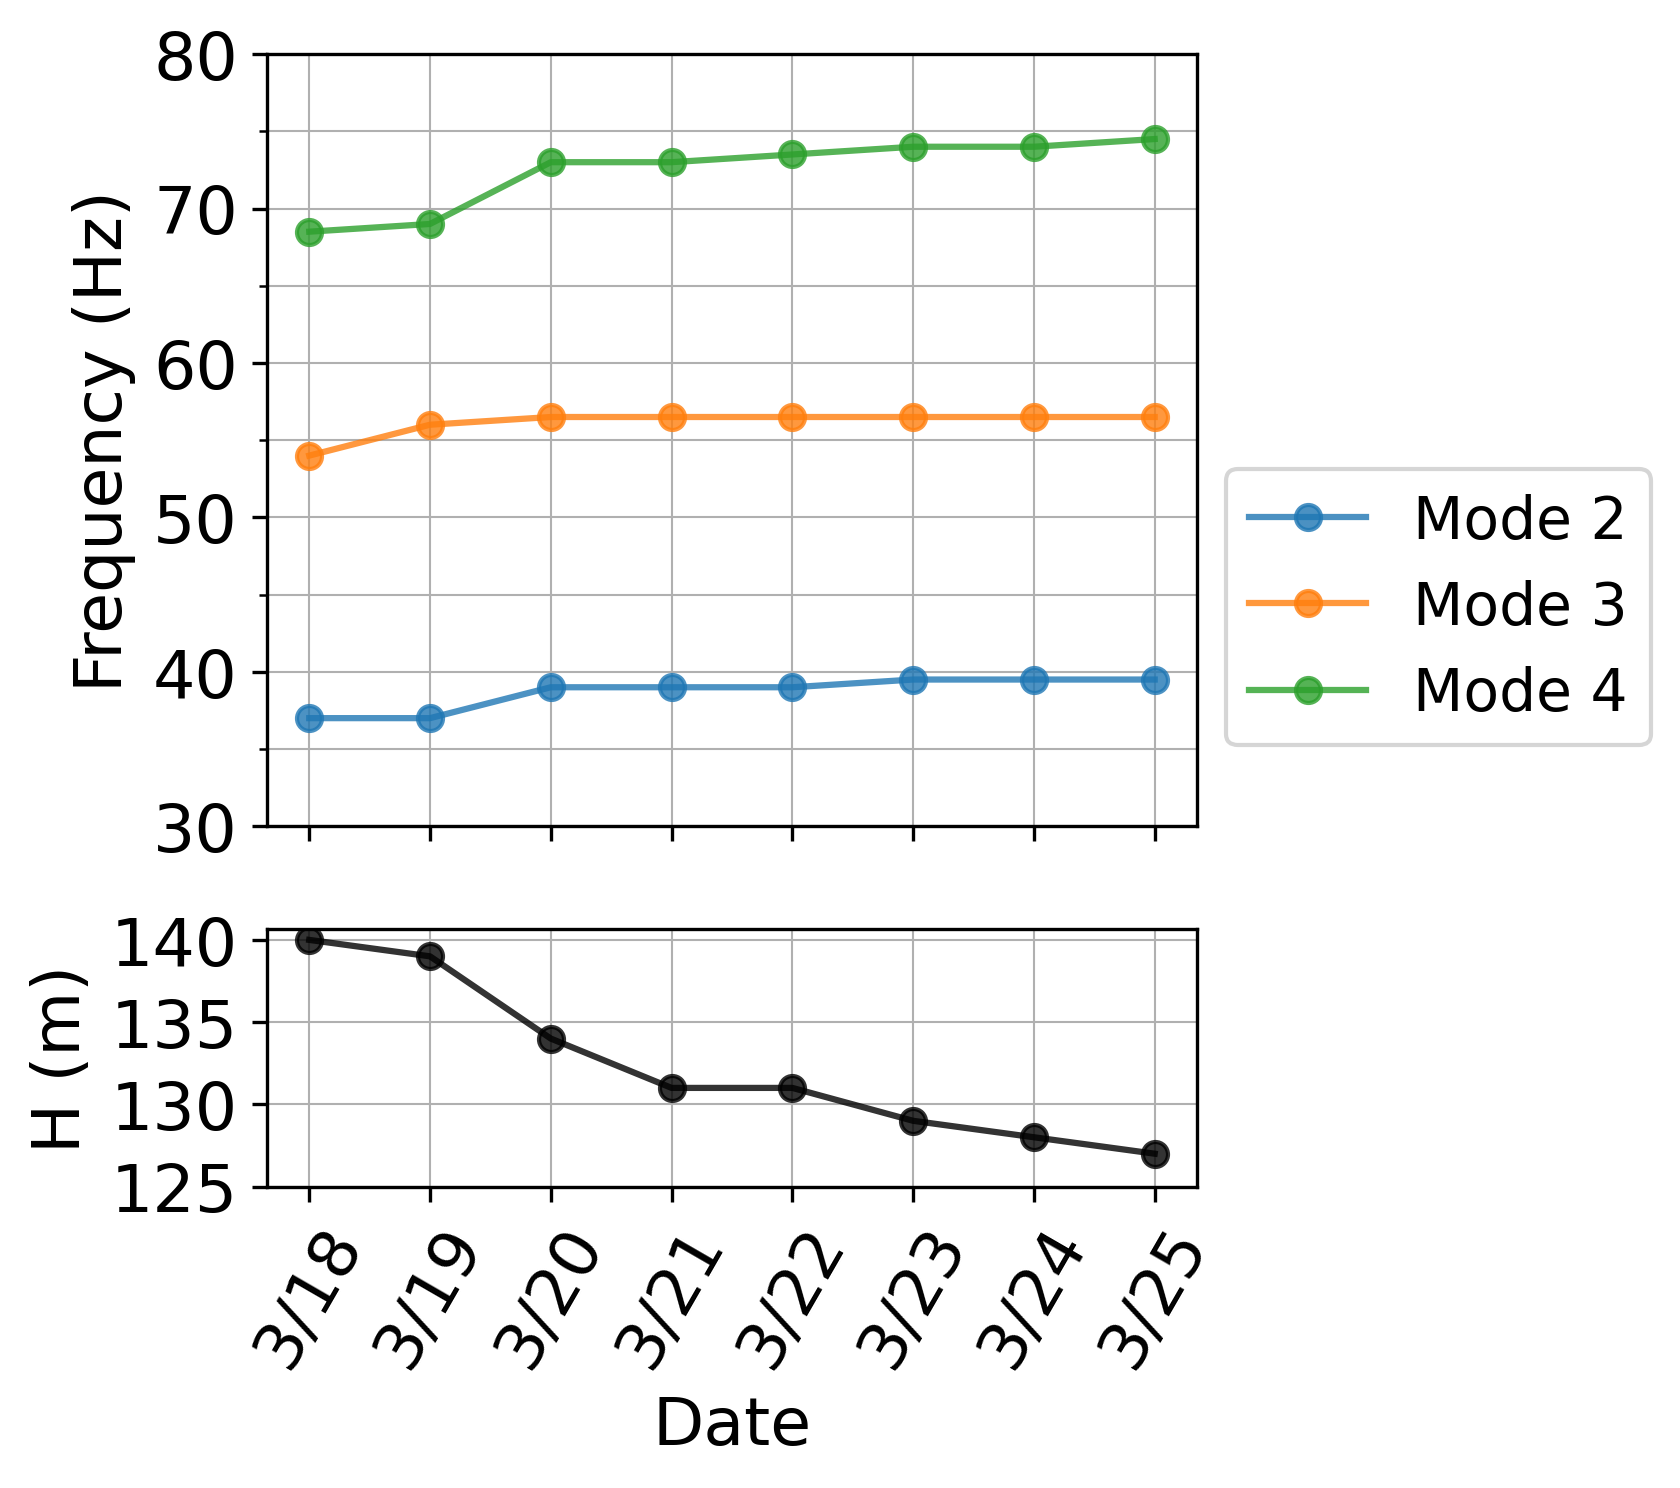

In [11]:
# Plot the L and f changes together
fig,ax=plt.subplots(2,1,figsize=[4,5],sharex=True,gridspec_kw={'height_ratios':[3,1]})
plt.rcParams['font.size']=16

# f part
for m,m_trace in enumerate(fls_list.T):
    if m !=0:
        ax[0].plot(m_trace,marker='o',label='Mode %s'%(m+1),alpha=0.8)
ax[0].grid(which='both',linewidth=0.5)
ax[0].set_yticks(np.arange(30,80+1,10))
ax[0].set_xticks(np.arange(0,8,1))
ax[0].set_ylabel('Frequency (Hz)')
ax[0].yaxis.set_major_locator(MultipleLocator(10))
ax[0].yaxis.set_minor_locator(MultipleLocator(5))
ax[0].legend(fontsize=14,bbox_to_anchor=(0,0,1,0.9))
ax[0].legend(fontsize=14,bbox_to_anchor=(1,0.5))
# L part
L_list= L1-L0
plt.plot(L_list[0],marker='o',alpha=0.8,color='k')
ax[1].grid(linewidth=0.5)

ax[1].set_xticks(np.arange(0,8,1))
ax[1].set_xticklabels(['3/%s'%i for i in np.arange(18,25+1,1)],rotation=60)
ax[1].set_ylabel('H (m)')
plt.xlabel('Date')
ax[1].set_yticks(np.arange(125,140+1,5))
plt.show()

## Estimate the velocities 

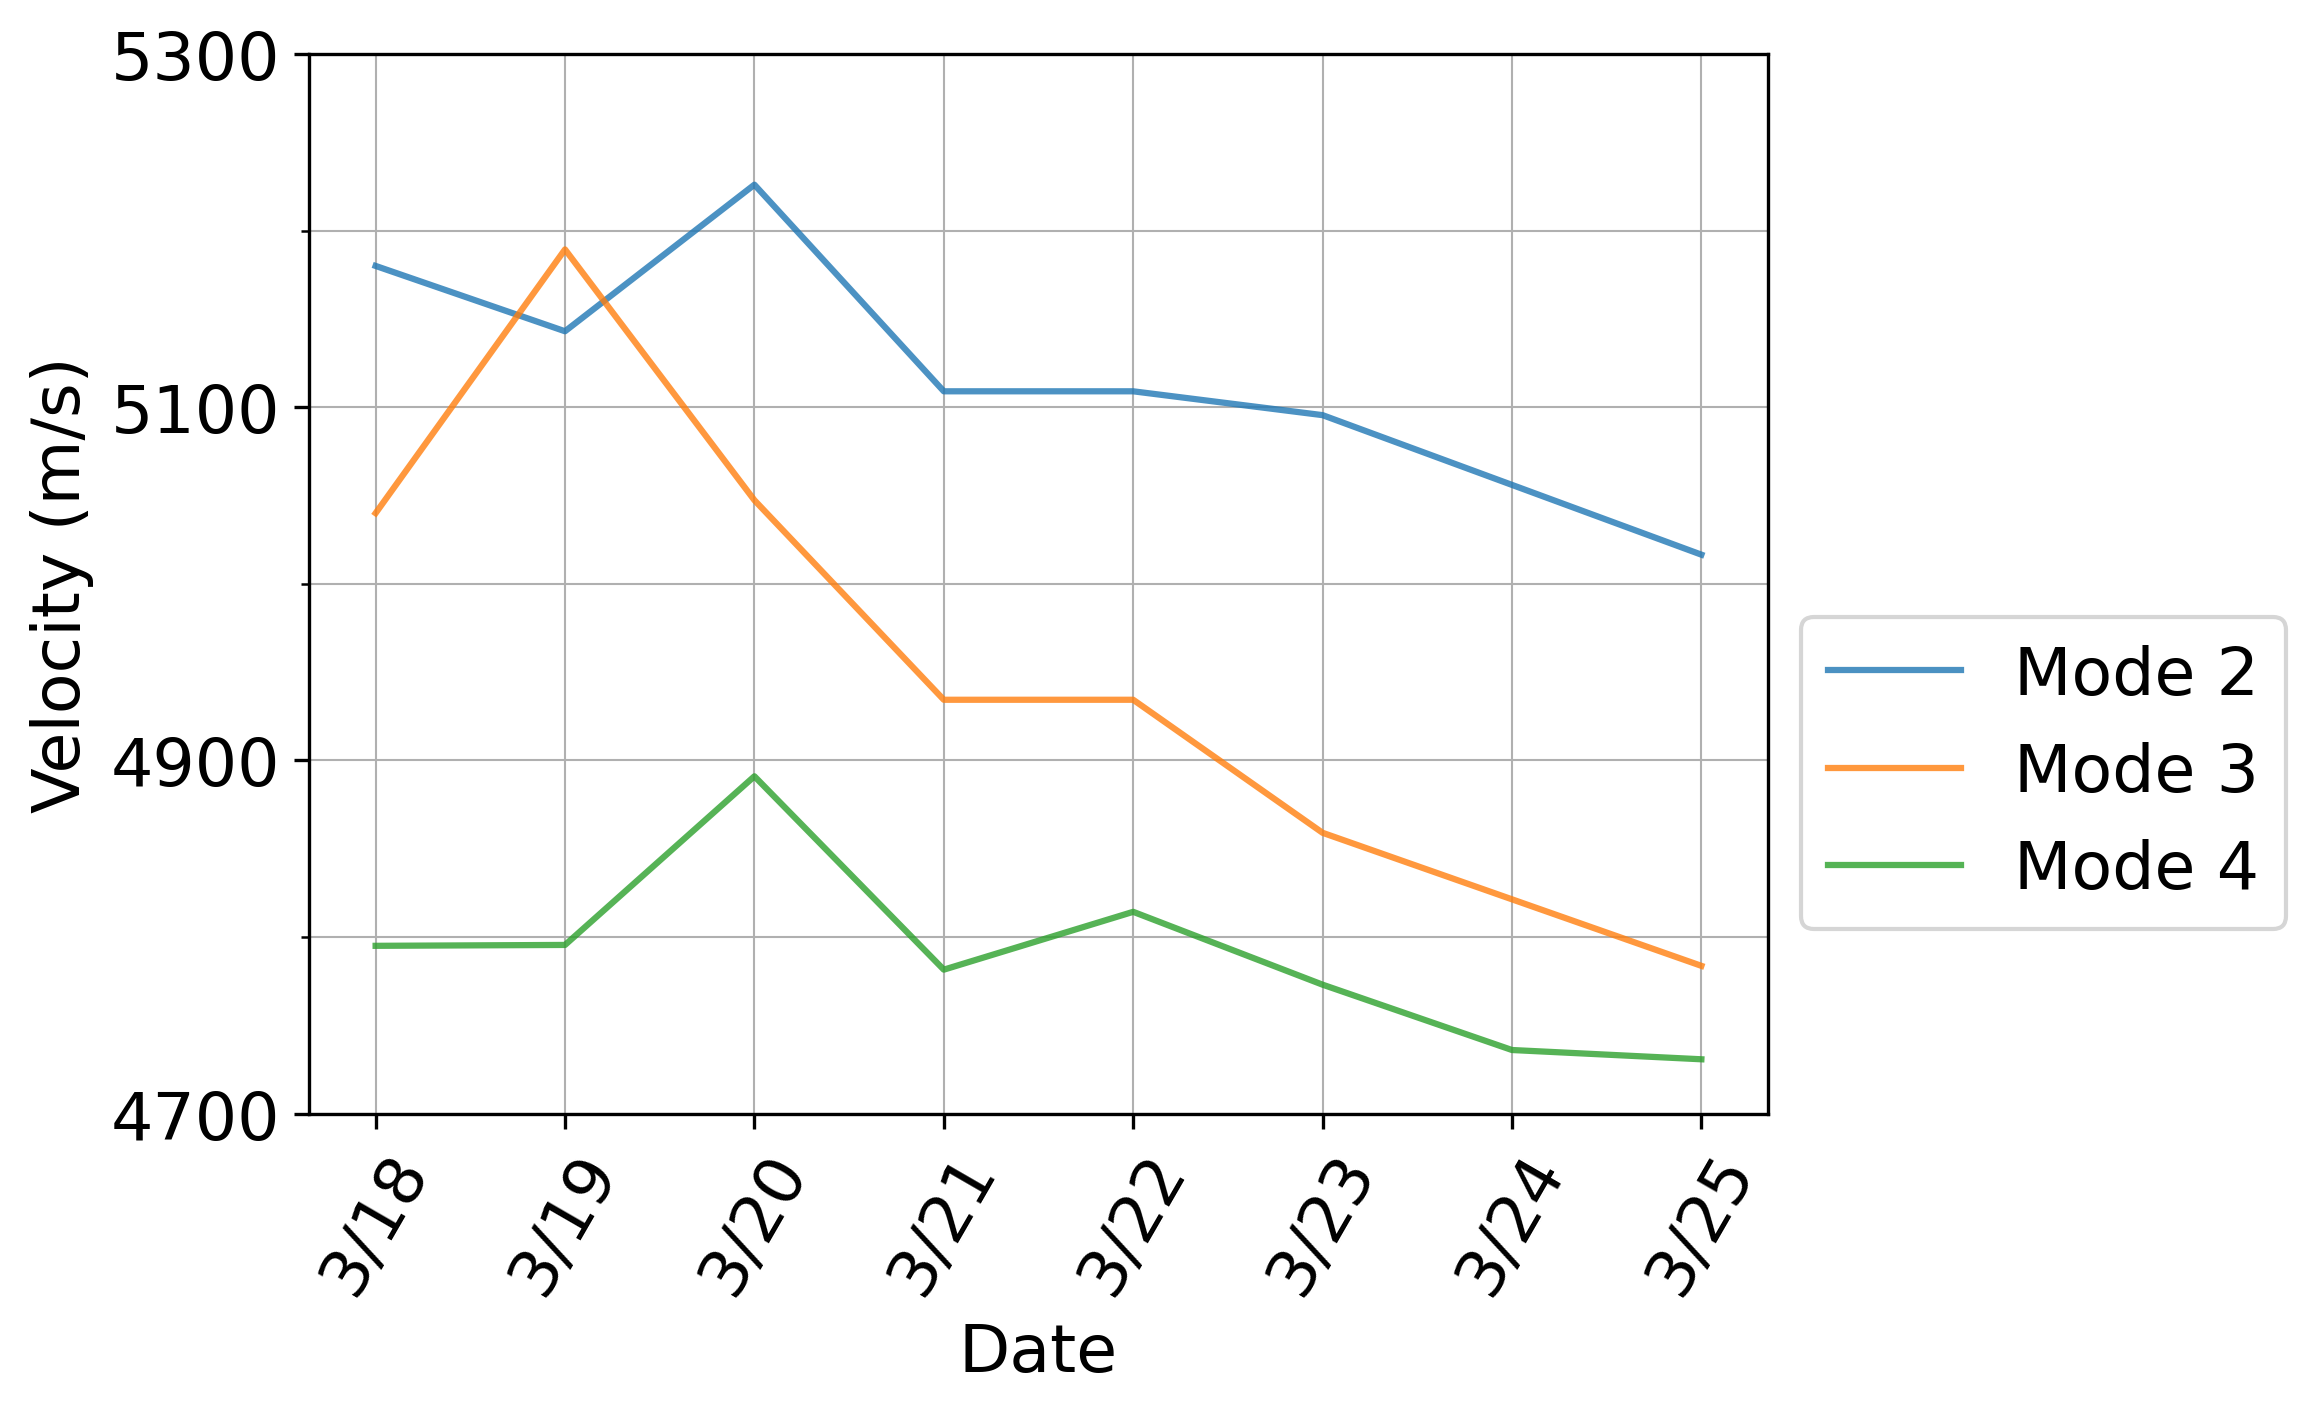

In [12]:
l_list=np.tile(np.arange(1,mode1+1,1),(8,1)) # List of mode numbers copy to 8 days
c=2*fls_list.T*L_list/l_list.T               # This is the estimated velocities

# Plot velocities
fig,ax=plt.subplots(figsize=[8,5])
for l in range(mode0,mode1+1):
    plt.plot(c[l-1],alpha=0.8,label='Mode %s'%l)
plt.xticks(np.arange(8))  # Manually fit the x ticks for the 8 days
ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(100))
ax.set_yticks(np.arange(4700,5300+1,200))
ax.set_xticklabels(['3/%s'%date for date in np.arange(18,25+1)],rotation=60)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel('Date')
plt.ylabel('Velocity (m/s)')
plt.grid(which='both',linewidth=0.5)
plt.tight_layout()
